In [77]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import numpy
import string
import random
import pandas as pd
import string
from sklearn import linear_model
from tqdm import tqdm
from types import NoneType
import matplotlib.pyplot as plt
import pickle 
import datetime

In [2]:
# users = open("users.pkl",'rb')
# users = pickle.load(users)
dataset_dir = "../Datasets/"
places = open(dataset_dir+"places.pkl",'rb')
places = pickle.load(places)
#reviews = open("reviews.pkl",'rb')
#reviews = pickle.load(reviews)

In [3]:
closed_bus = places.drop(places[(places.closed == False)].index )
#merged = merged.drop(merged[(merged.lat < -180 ) | (merged.lat > 180)].index)


In [4]:
places.shape[0]-closed_bus.shape[0]

3014138

In [5]:
closed_bus.head()

,name,price,gPlusPlaceId,gps,closed
18,까사로까 여의도점,None,100781305512646551142,"[37.524039, 126.926004]",True
30,Hungry Howie's Pizza & Subs,None,118117723948195890487,"[41.610549, -83.712633]",True
48,Agrasen Restaurant,None,116624270028504419560,"[21.895619, 83.395168]",True
69,亞美的豆漿大王,None,104714054272894974993,"[25.004093, 121.524695]",True
121,Old Tubac Inn,None,100971345940383183751,"[31.613026, -111.048627]",True


In [6]:
## Finding closed business in USA 
closed_bus['lat'] = closed_bus['gps'].apply(lambda x : x[0] if (x is not None) else -200)
closed_bus['lon'] = closed_bus['gps'].apply(lambda x : x[1] if (x is not None) else -200)

In [7]:
closed_bus = closed_bus.drop(closed_bus[(closed_bus.lat < 32.509762 ) | (closed_bus.lat > 48.611122)].index)
closed_bus = closed_bus.drop(closed_bus[(closed_bus.lon < -120.080438 ) | (closed_bus.lon > -58.557279)].index)

In [8]:
closed_bus.shape

(38671, 7)

In [9]:
closed_bus.reset_index(drop=True)

,name,price,gPlusPlaceId,gps,closed,lat,lon
0,Hungry Howie's Pizza & Subs,None,118117723948195890487,"[41.610549, -83.712633]",True,41.610549,-83.712633
1,Los Olivos Carniceria,None,115815272143996531476,"[33.583379, -112.220743]",True,33.583379,-112.220743
2,JCPenney Outlet Store,$$,100244470396119827933,"[32.968056, -97.040605]",True,32.968056,-97.040605
3,Dave's Downtown Taverna,$$$,100736413569854506389,"[38.448119, -78.869041]",True,38.448119,-78.869041
4,Wendy's,$$$,108732518429416544409,"[32.723804, -97.464122]",True,32.723804,-97.464122
...,...,...,...,...,...,...,...
38666,Track Side Grille,None,113143576618615079253,"[40.9248, -74.11115]",True,40.924800,-74.111150
38667,Italiano's Pasta & Pizza,$$,112103461756338754948,"[35.520011, -97.503577]",True,35.520011,-97.503577
38668,Lao Hu Cheng Asian Bistro,$$,117344903957938031090,"[34.691997, -82.845229]",True,34.691997,-82.845229
38669,The Hanger Room,$$,113656622925160329710,"[45.057115, -92.957878]",True,45.057115,-92.957878


In [10]:
closed_bus['price'].value_counts()

$$     6654
$$$    5187
$       762
         50
Name: price, dtype: int64

In [11]:
closed_bus['name'].value_counts()

Quiznos Sandwich Restaurants    146
Burger King                     120
KFC                             105
Caribou Coffee                   86
Pizza Hut                        82
                               ... 
New Ocean City                    1
Formal & Bridal Center            1
Ivy's Cafe                        1
Terrene Restaurant                1
Gameology Supply Co               1
Name: name, Length: 32464, dtype: int64

In [12]:
all_usa =  pd.read_pickle("../Datasets/USA_Filtered.pkl")

In [13]:
all_usa.head()

,userName,gPlusUserId,rating,reviewText,categories,gPlusPlaceId,unixReviewTime,name,price,gps,closed,lat,lon
0,Jacquelyn Dorris,100000035085750632094,5.0,None,[College],104616184831707794985,1.331940e+09,Mt Sierra College,None,"[34.140884, -117.999102]",False,34.140884,-117.999102
1,David Mannington,104373107701194289732,2.0,I rather go to PCC. This school is money hungr...,[College],104616184831707794985,1.380309e+09,Mt Sierra College,None,"[34.140884, -117.999102]",False,34.140884,-117.999102
2,Victoria Negrete,105439490555882931029,3.0,None,[College],104616184831707794985,1.358380e+09,Mt Sierra College,None,"[34.140884, -117.999102]",False,34.140884,-117.999102
3,Mirna de Lira Lopez,107864646426078082690,5.0,If you are looking for a school that offers re...,[College],104616184831707794985,1.394746e+09,Mt Sierra College,None,"[34.140884, -117.999102]",False,34.140884,-117.999102
4,Robert Gutierrez,109158900084474679244,4.0,College is what you make of it. If you pay at...,[College],104616184831707794985,1.385525e+09,Mt Sierra College,None,"[34.140884, -117.999102]",False,34.140884,-117.999102


In [14]:
closed_list = list(closed_bus['gPlusPlaceId'])
all_usa['drp'] = all_usa['gPlusPlaceId'].apply(lambda x : x in closed_list)

In [15]:
all_usa['drp']

0          False
1          False
2          False
3          False
4          False
           ...  
3078377    False
3078378    False
3078379    False
3078380    False
3078381    False
Name: drp, Length: 3078382, dtype: bool

In [16]:
all_usa = all_usa.drop(all_usa[(all_usa.drp == False )].index)

True    84977
Name: closed, dtype: int64

In [53]:
all_usa.reset_index(drop=True)

,userName,gPlusUserId,rating,reviewText,categories,gPlusPlaceId,unixReviewTime,name,price,gps,closed,lat,lon,drp
0,Will Baber,100000448284107322955,5.0,Cool,"[Barbecue Restaurant, Caterer, Brewpub]",111199329511112880492,1.350006e+09,Sam Taylor's Bar B-Q,$$$,"[39.708372, -104.933613]",True,39.708372,-104.933613,True
1,Isaac Oxom-Montenegro,102233430155525820021,3.0,None,"[Barbecue Restaurant, Caterer, Brewpub]",111199329511112880492,1.322616e+09,Sam Taylor's Bar B-Q,$$$,"[39.708372, -104.933613]",True,39.708372,-104.933613,True
2,Joshua Jamison,103203314859566576853,3.0,"Pretty good food, atmosphere was not necessari...","[Barbecue Restaurant, Caterer, Brewpub]",111199329511112880492,1.289923e+09,Sam Taylor's Bar B-Q,$$$,"[39.708372, -104.933613]",True,39.708372,-104.933613,True
3,Michael Dickerson,104184706312948595465,4.0,My favorite bbq in town!,"[Barbecue Restaurant, Caterer, Brewpub]",111199329511112880492,1.339028e+09,Sam Taylor's Bar B-Q,$$$,"[39.708372, -104.933613]",True,39.708372,-104.933613,True
4,Alex Levensalor,111309016129631977248,3.0,None,"[Barbecue Restaurant, Caterer, Brewpub]",111199329511112880492,1.292965e+09,Sam Taylor's Bar B-Q,$$$,"[39.708372, -104.933613]",True,39.708372,-104.933613,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84972,Paul Brin,114671923037657547567,5.0,Too bad that they closed.,[Deli],106585582655956128880,1.367928e+09,Rosalia's Old World Italian Deli,None,"[38.002651, -84.545295]",True,38.002651,-84.545295,True
84973,Carla Denise Stinson,114672030820876276908,5.0,I loved Cafe 103 but it is now closed!!! Not s...,"[Eclectic Restaurant, Cafe, American Restaurant]",106861999928328807486,1.342680e+09,Cafe 103,$,"[41.706489, -87.66958]",True,41.706489,-87.669580,True
84974,Toby Metcalf,114672165476674395191,5.0,An awesome local butcher! Sad to write that I ...,[Gourmet Grocery Store],113711296349257074217,1.390685e+09,John Dewar & Co Inc,None,"[42.301641, -71.288722]",True,42.301641,-71.288722,True
84975,Terry Richards,114672393604744185833,3.0,None,[Pizza],109092302792269741282,1.328054e+09,Palace Fried Chicken & Pizza,$$,"[40.772013, -73.925894]",True,40.772013,-73.925894,True


In [54]:
all_usa['gPlusUserId'].value_counts()

106654503918907830147    157
104819208193648646391     90
113578185276530421036     70
104625452331651117595     65
114067240259921785832     51
                        ... 
101453616239495940862      1
101453961181702717544      1
101454049618541700491      1
101455831121749888509      1
114672393604744185833      1
Name: gPlusUserId, Length: 64991, dtype: int64

In [68]:
Caribou_ = all_usa[ all_usa.gPlusUserId == '104819208193648646391']

In [69]:
Caribou_.reset_index(drop=True)

,userName,gPlusUserId,rating,reviewText,categories,gPlusPlaceId,unixReviewTime,name,price,gps,closed,lat,lon,drp
0,Gregor J. Rothfuss,104819208193648646391,4.0,"without fung wah and its many offspring, we wo...","[Bus Station, Bus Line Company, Bus Ticket Age...",101423405924612903704,1.278377e+09,Fung Wah Bus Transportation,None,"[40.716189, -73.995448]",True,40.716189,-73.995448,True
1,Gregor J. Rothfuss,104819208193648646391,5.0,a beautiful reimagining of public space. one c...,[Diner],110235601903448206734,1.286665e+09,Highliner,$,"[40.747951, -74.004764]",True,40.747951,-74.004764,True
2,Gregor J. Rothfuss,104819208193648646391,3.0,"entirely adequate food, but no more. went for ...","[Hamburger Restaurant, American Restaurant, Fa...",112847503935460388913,1.292643e+09,Stand4,$$$,"[40.734032, -73.993248]",True,40.734032,-73.993248,True
3,Gregor J. Rothfuss,104819208193648646391,3.0,"Super salty and oily food, but also delicious:...",None,116910695063643696109,1.360465e+09,Mission Chinese Food,$$,"[40.720796, -73.988725]",True,40.720796,-73.988725,True
4,Gregor J. Rothfuss,104819208193648646391,4.0,None,"[Crêperie, French Restaurant]",108487618329934579388,1.301239e+09,Bar Breton,$,"[40.744893, -73.987335]",True,40.744893,-73.987335,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Gregor J. Rothfuss,104819208193648646391,3.0,certainly not worth the wait on a weekend. und...,"[American Restaurant, Diner]",114351512848156771317,1.275279e+09,EJ's Luncheonette,$$$,"[40.784595, -73.977088]",True,40.784595,-73.977088,True
86,Gregor J. Rothfuss,104819208193648646391,3.0,it was passable.,"[Asian Restaurant, South Asian Restaurant, Ind...",114587787885505655049,1.293735e+09,Sirtaj,$$$,"[40.744422, -73.990414]",True,40.744422,-73.990414,True
87,Gregor J. Rothfuss,104819208193648646391,3.0,"pretty expensive place. $14 for some coffee, e...","[Convenience Store, Deli]",115936846092491104712,1.351914e+09,17 Greene Farm,None,"[40.68602, -73.972655]",True,40.686020,-73.972655,True
88,Gregor J. Rothfuss,104819208193648646391,3.0,"brunch, meh. but this place does it alright.","[American Restaurant, Diner]",115979744638413238003,1.278543e+09,Sunny's Diner,None,"[42.361578, -71.098114]",True,42.361578,-71.098114,True


In [ ]:
#Result : No cooreation found 

In [70]:
#Caribou_['date'] = pd.to_datetime(Caribou_['unixReviewTime'],unit='s')
#Caribou_['month'] = pd.to_datetime(Caribou_['unixReviewTime'],unit='s').dt.month
#Caribou_['year'] = pd.to_datetime(Caribou_['unixReviewTime'],unit='s').dt.year
Caribou_['month-year']  = pd.to_datetime(Caribou_['unixReviewTime'],unit='s').dt.strftime('%Y-%m')

/var/folders/j0/1_5y0t9d6vv2rnwk5b6sfvq40000gn/T/ipykernel_55947/1864211770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Caribou_['month-year']  = pd.to_datetime(Caribou_['unixReviewTime'],unit='s').dt.strftime('%Y-%m')


In [71]:
Caribou_

,userName,gPlusUserId,rating,reviewText,categories,gPlusPlaceId,unixReviewTime,name,price,gps,closed,lat,lon,drp,month-year
15616,Gregor J. Rothfuss,104819208193648646391,4.0,"without fung wah and its many offspring, we wo...","[Bus Station, Bus Line Company, Bus Ticket Age...",101423405924612903704,1.278377e+09,Fung Wah Bus Transportation,None,"[40.716189, -73.995448]",True,40.716189,-73.995448,True,2010-07
50333,Gregor J. Rothfuss,104819208193648646391,5.0,a beautiful reimagining of public space. one c...,[Diner],110235601903448206734,1.286665e+09,Highliner,$,"[40.747951, -74.004764]",True,40.747951,-74.004764,True,2010-10
52714,Gregor J. Rothfuss,104819208193648646391,3.0,"entirely adequate food, but no more. went for ...","[Hamburger Restaurant, American Restaurant, Fa...",112847503935460388913,1.292643e+09,Stand4,$$$,"[40.734032, -73.993248]",True,40.734032,-73.993248,True,2010-12
55714,Gregor J. Rothfuss,104819208193648646391,3.0,"Super salty and oily food, but also delicious:...",None,116910695063643696109,1.360465e+09,Mission Chinese Food,$$,"[40.720796, -73.988725]",True,40.720796,-73.988725,True,2013-02
154756,Gregor J. Rothfuss,104819208193648646391,4.0,None,"[Crêperie, French Restaurant]",108487618329934579388,1.301239e+09,Bar Breton,$,"[40.744893, -73.987335]",True,40.744893,-73.987335,True,2011-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453576,Gregor J. Rothfuss,104819208193648646391,3.0,certainly not worth the wait on a weekend. und...,"[American Restaurant, Diner]",114351512848156771317,1.275279e+09,EJ's Luncheonette,$$$,"[40.784595, -73.977088]",True,40.784595,-73.977088,True,2010-05
2453588,Gregor J. Rothfuss,104819208193648646391,3.0,it was passable.,"[Asian Restaurant, South Asian Restaurant, Ind...",114587787885505655049,1.293735e+09,Sirtaj,$$$,"[40.744422, -73.990414]",True,40.744422,-73.990414,True,2010-12
2453625,Gregor J. Rothfuss,104819208193648646391,3.0,"pretty expensive place. $14 for some coffee, e...","[Convenience Store, Deli]",115936846092491104712,1.351914e+09,17 Greene Farm,None,"[40.68602, -73.972655]",True,40.686020,-73.972655,True,2012-11
2453630,Gregor J. Rothfuss,104819208193648646391,3.0,"brunch, meh. but this place does it alright.","[American Restaurant, Diner]",115979744638413238003,1.278543e+09,Sunny's Diner,None,"[42.361578, -71.098114]",True,42.361578,-71.098114,True,2010-07


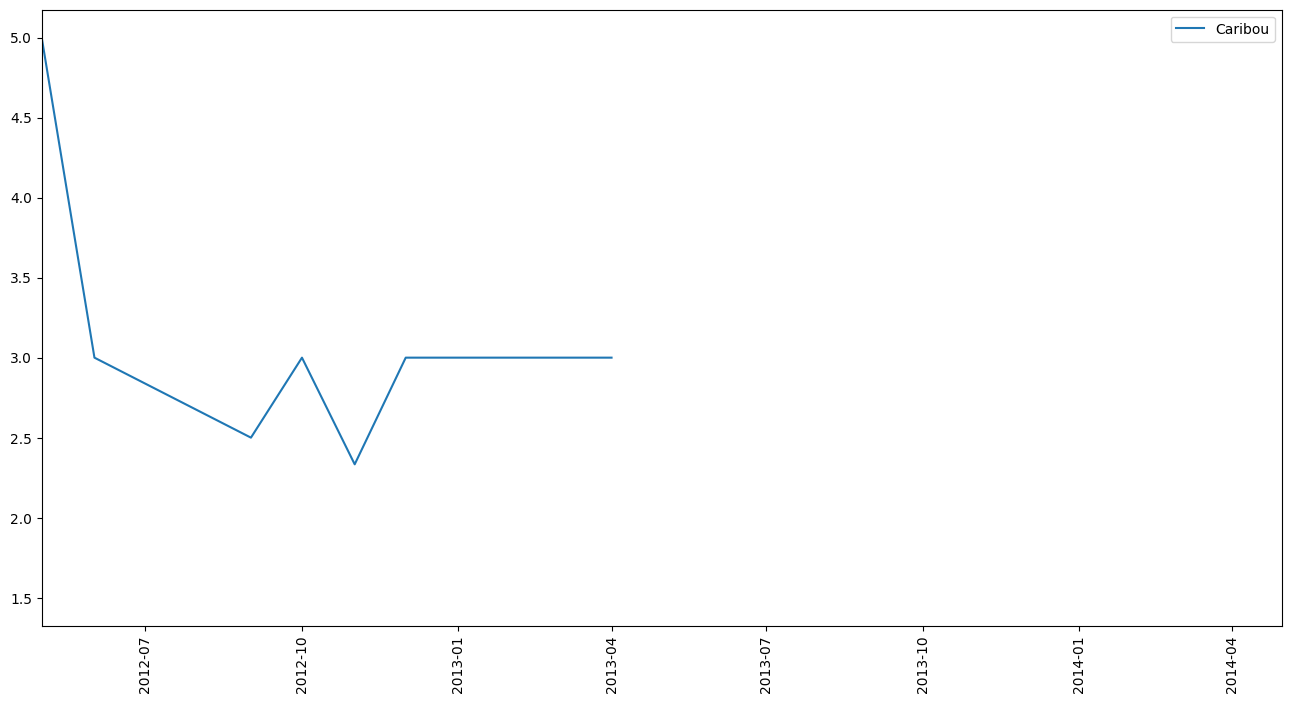

In [78]:
t = pd.DataFrame()
fig = plt.figure(figsize=(16, 8))
df_usr = Caribou_
imp = pd.DataFrame()
imp['rating'] = df_usr['rating']
imp['time'] = df_usr['month-year']
imp.reset_index(drop=True)
to_plot = pd.DataFrame()
to_plot = imp.groupby('time').mean()
to_plot = to_plot.reset_index()
to_plot = to_plot.sort_values(by=['time'])
to_plot['time']= pd.to_datetime(to_plot['time'])
plt.plot(list(to_plot['time']), list(to_plot['rating']), label="Caribou")
plt.xticks(rotation=90)
plt.xlim([ datetime.datetime(2012, 5, 1) , datetime.datetime(2014, 4, 30) ])
plt.legend()
plt.show()

In [1]:
# No significant findings 